# DATA INTERPRETATION

In [103]:
import os                       #paths to file
import numpy as np              #linear algebra
import pandas as pd             #data processing
import warnings                 # warning filter
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns           #Data visualization
%matplotlib inline

#train test split
from sklearn.model_selection import train_test_split

#future engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection import cross_val_score as CVS

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#cross validation
from sklearn.model_selection import cross_val_score as CVS
import pandas as pd
df = pd.read_csv("/kaggle/input/bigmart/Test.csv")
df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007         NaN               Tier 2   
2                          1998         NaN               Tier 3   
3                          2007         NaN               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002         NaN               Tier 2   
5679                       2007         NaN               Tier 2   
5680                       2002         NaN               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 11 columns]

# Problem Statement


* The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.
* Also, certain attributes of each product and store have been defined. 
* The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

In [104]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [106]:
df.isnull()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0               False        False             False            False   
1               False        False             False            False   
2               False        False             False            False   
3               False        False             False            False   
4               False         True             False            False   
...               ...          ...               ...              ...   
5676            False        False             False            False   
5677            False        False             False            False   
5678            False        False             False            False   
5679            False        False             False            False   
5680            False        False             False            False   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0         False     False              False                      False   
1         False     False              False                      False   
2         False     False              False                      False   
3         False     False              False                      False   
4         False     False              False                      False   
...         ...       ...                ...                        ...   
5676      False     False              False                      False   
5677      False     False              False                      False   
5678      False     False              False                      False   
5679      False     False              False                      False   
5680      False     False              False                      False   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
0           False                 False        False  
1            True                 False        False  
2            True                 False        False  
3            True                 False        False  
4           False                 False        False  
...           ...                   ...          ...  
5676        False                 False        False  
5677        False                 False        False  
5678         True                 False        False  
5679         True                 False        False  
5680         True                 False        False  

[5681 rows x 11 columns]

# Data Loading

In [107]:
import pandas as pd
df = pd.read_csv("/kaggle/input/bigmart/Train.csv")
df
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Combining

In [109]:
# test_df['Item_Outlet_sales'] = np.nan
df['source'] = 'df'
df['source'] = 'df'
data = pd.concat([df, df], ignore_index=True)
print('After Combining Datasets: ', data.shape)

After Combining Datasets:  (17046, 13)


In [110]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

# Data Exploration

**Missing Values**

**Variable Identification**

**Univariate Analysis**

**Bi-variate Analysis**

**Outlier Treatment**

**Variable Transformation**

**Variable Creation**

# Missing value treatment

In [111]:
# Let's check missing values
print('Test:\n')
print('Missing values by count: \n\n',
      data.isnull().sum().sort_values(ascending=False),'\n\nMissing values by %:\n\n',
      data.isnull().sum().sort_values(ascending=False)/data.shape[0]*100)

Test:

Missing values by count: 

 Outlet_Size                  4820
Item_Weight                  2926
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64 

Missing values by %:

 Outlet_Size                  28.276428
Item_Weight                  17.165317
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
source           

In [112]:
#Let's check and imputate missing value
print('Missing values in Outlet_Size:\n\n',
      df.Outlet_Size.value_counts())

Missing values in Outlet_Size:

 Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64


In [113]:
print('Missing values in Item_Weight:\n\n',
      df.Item_Weight.value_counts())

Missing values in Item_Weight:

 Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64


# Outlet_size is a categorical column, we can use mode to fill values

In [114]:
# Filling outlet missing values.
# Data['Outlet_size'] = data.Outlet_Size.fillna(data.Outlet_Size, dropna().model()[0])
# Checking if we filled all values

print('Missing values in Item_weight: ', len(df[df.Outlet_Size.isnull()]))
miss_values = data.Outlet_Size.isnull()
Outlet_Size_avg =  data.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
data.loc[miss_values, 'Outlet_Size'] = data.loc[miss_values, 'Outlet_Type'].apply(lambda x:Outlet_Size_avg.loc[x])
print('Missing values after filling: ', sum(data['Outlet_Size'].isnull()))

Missing values in Item_weight:  2410
Missing values after filling:  0


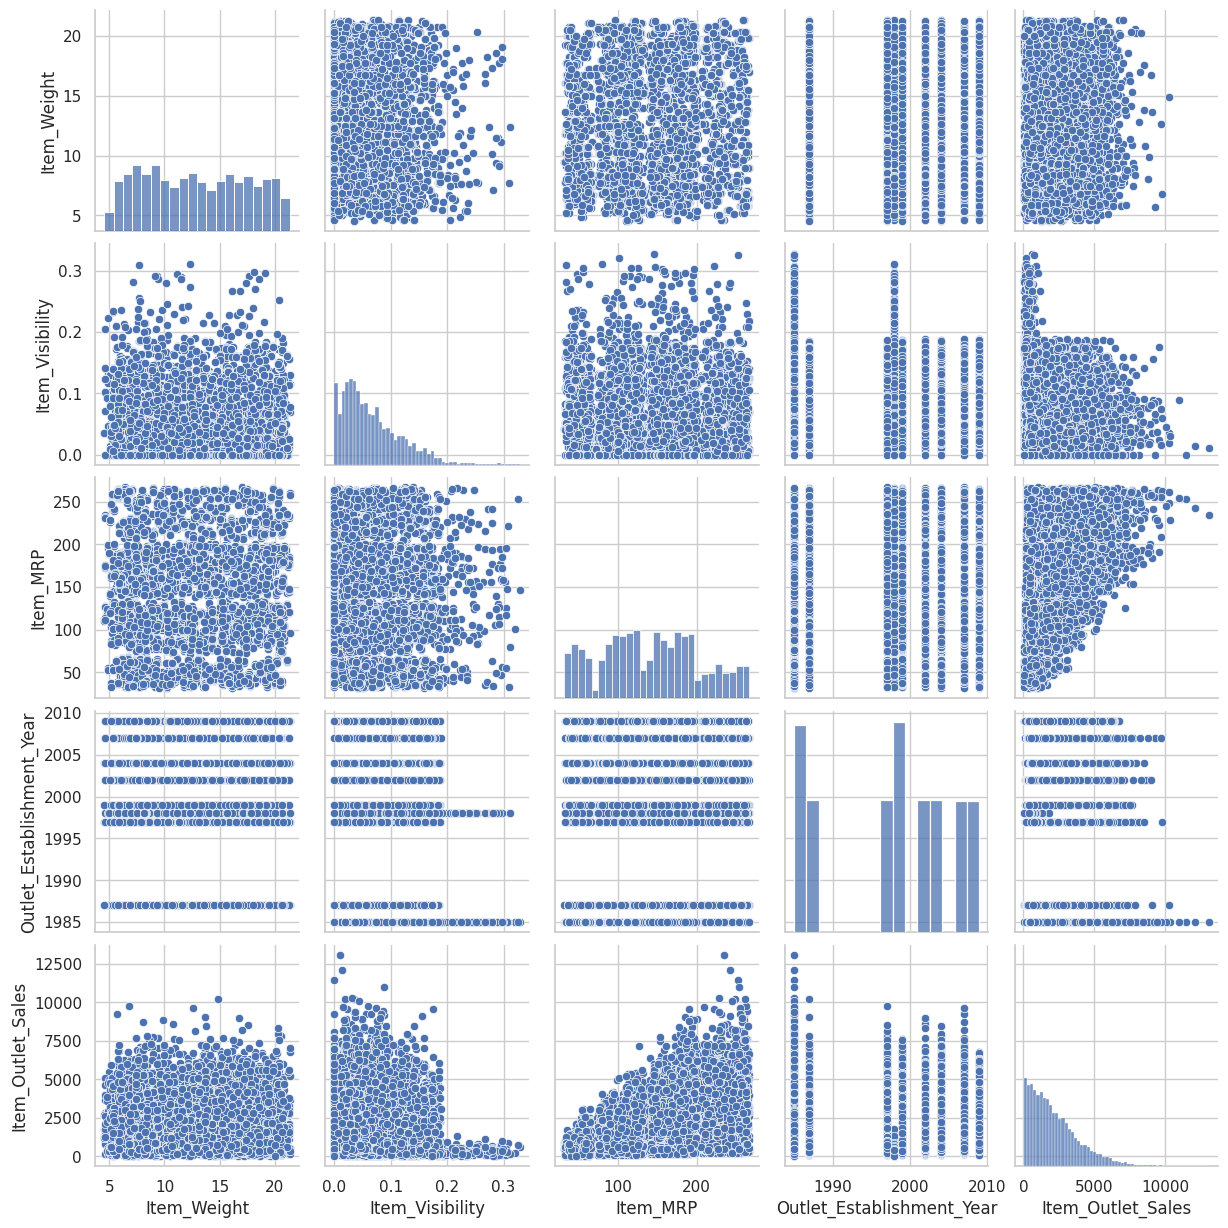

In [115]:
sns.pairplot(df)

Text(0.5, 1.0, 'Item Weight Distribution')

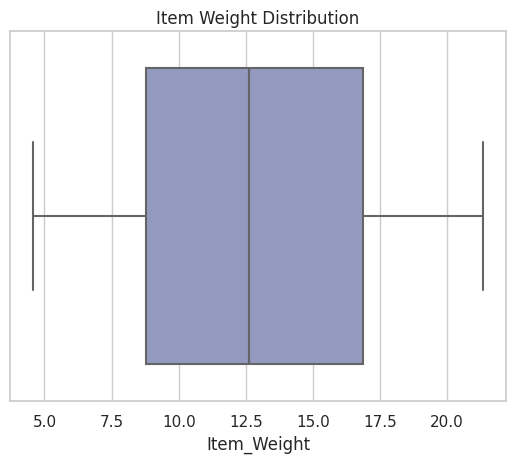

In [116]:
sns.boxplot(x=data['Item_Weight'], palette='BuPu')
plt.title('Item Weight Distribution')

# Check info for missing values

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17046 entries, 0 to 17045
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            17046 non-null  object 
 1   Item_Weight                14120 non-null  float64
 2   Item_Fat_Content           17046 non-null  object 
 3   Item_Visibility            17046 non-null  float64
 4   Item_Type                  17046 non-null  object 
 5   Item_MRP                   17046 non-null  float64
 6   Outlet_Identifier          17046 non-null  object 
 7   Outlet_Establishment_Year  17046 non-null  int64  
 8   Outlet_Size                17046 non-null  object 
 9   Outlet_Location_Type       17046 non-null  object 
 10  Outlet_Type                17046 non-null  object 
 11  Item_Outlet_Sales          17046 non-null  float64
 12  source                     17046 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

# EDA Analysis

In [118]:
# Best Auto EDA Analysis
# data1 = data.drop(["Item_Identifier", "Outlet_Identifier"], axis=1)
# Data_Profile = ProfileReport(data1)
# Data_Profile

# Variable Identication

In [119]:
# Numericals
num_df = data.select_dtypes('number')

# Categorical
cat_df = data.select_dtypes('object')

In [120]:
# Let's deal with the categorical data first
for col in cat_df.columns:
    if(col != 'Item_Identifier'):
        print('\nFrequency of Categories for variable %s'%col)
        print('\ntotal Categories:', len(cat_df[col].value_counts()), '\n', cat_df[col].value_counts())


Frequency of Categories for variable Item_Fat_Content

total Categories: 5 
 Item_Fat_Content
Low Fat    10178
Regular     5778
LF           632
reg          234
low fat      224
Name: count, dtype: int64

Frequency of Categories for variable Item_Type

total Categories: 16 
 Item_Type
Fruits and Vegetables    2464
Snack Foods              2400
Household                1820
Frozen Foods             1712
Dairy                    1364
Canned                   1298
Baking Goods             1296
Health and Hygiene       1040
Soft Drinks               890
Meat                      850
Breads                    502
Hard Drinks               428
Others                    338
Starchy Foods             296
Breakfast                 220
Seafood                   128
Name: count, dtype: int64

Frequency of Categories for variable Outlet_Identifier

total Categories: 10 
 Outlet_Identifier
OUT027    1870
OUT013    1864
OUT049    1860
OUT046    1860
OUT035    1860
OUT045    1858
OUT018    1856
OUT

# Item_Fat_Content: We have repeated values in, lets replace them
# Item_Type: We have categories of items, that can be shrink
# Outlet_Type: We have Store type2 and type3 that can be combined

In [121]:
data['Item_Fat_Content'] = data.Item_Fat_Content.replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'])
data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    11034
Regular     6012
Name: count, dtype: int64

In [122]:
# Combine Item_Type, and create new category
data['Item_Type_Combined'] = data.Item_Identifier.apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].replace(['FD','DR','NC'],['Food','Drinks','Non-Consumable'])
data.Item_Type_Combined.value_counts()

Item_Type_Combined
Food              12250
Non-Consumable     3198
Drinks             1598
Name: count, dtype: int64

In [123]:
data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')

Item_Outlet_Sales
Outlet_Type                         
Grocery Store             339.828500
Supermarket Type1        2316.181148
Supermarket Type2        1995.498739
Supermarket Type3        3694.038558

There is a difference in sales, so not good idea to combine them.

In [124]:
# Let's deal with numerical 
num_df.describe()

Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  14120.000000     17046.000000  17046.000000               17046.000000   
mean      12.857645         0.066132    140.992782                1997.831867   
std        4.643292         0.051596     62.273240                   8.371515   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.773750         0.026988     93.817950                1987.000000   
50%       12.600000         0.053931    143.012800                1999.000000   
75%       16.850000         0.094594    185.652250                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count       17046.000000  
mean         2181.288914  
std          1706.449556  
min            33.290000  
25%           833.914500  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

# Outliers

Text(0.5, 1.0, 'Item Outlet Sales Distribution')

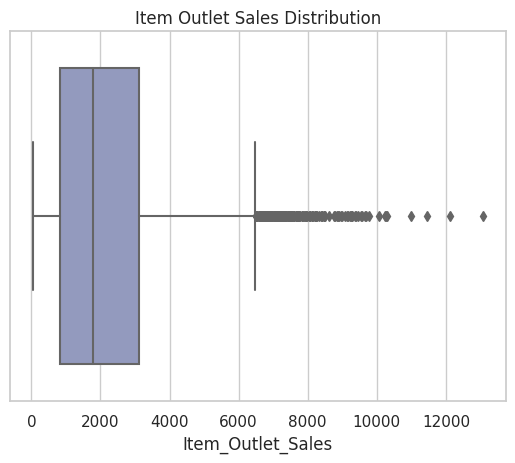

In [125]:
# Bix plot for Item_Outlet_Sales to see outliers
sns.boxplot(x=df['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution')

In [126]:
# Removng Outliers
def outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Outlet_Sales")
print("Upper whisker: ",upper)
print("Lower whisker: ",lower)
data=data[(data['Item_Outlet_Sales']>lower) & (data['Item_Outlet_Sales']<upper)]

Upper whisker:  6502.369250000001
Lower whisker:  -2567.1583500000006


Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

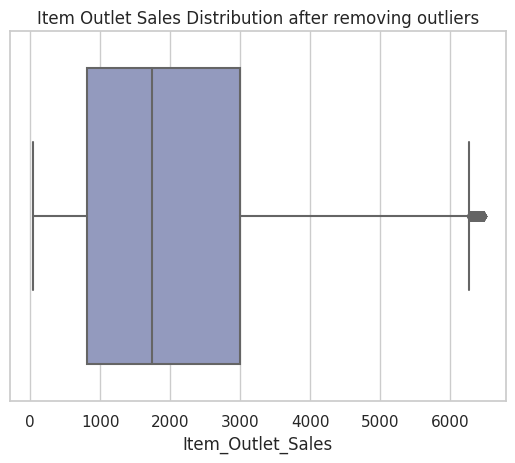

In [127]:
# Item_Outlet_Sales after removing outliers
sns.boxplot(x=data['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution after removing outliers')

In [128]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales source Item_Type_Combined  
0  Supermarket Type1          3735.1380     df               Food  
1  Supermarket Type2           443.4228     df             Drinks  
2  Supermarket Type1          2097.2700     df               Food  
3      Grocery Store           732.3800     df               Food  
4  Supermarket Type1           994.7052     df     Non-Consumable

# Data Visualization

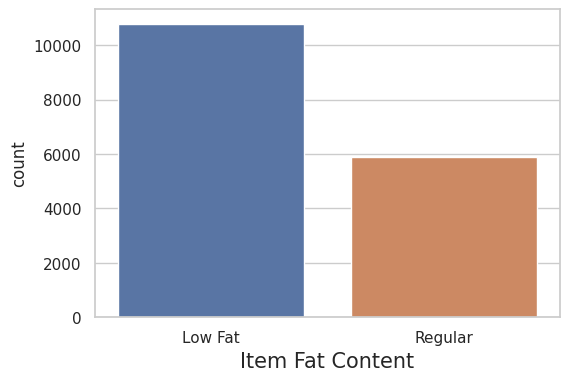

In [129]:
# Categorical data

# COUNTPLOT FOR ITEM_FAT_CONTENT
plt.figure(figsize=(6,4))
sns.countplot(data=data,x='Item_Fat_Content')
plt.xlabel('Item Fat Content', fontsize=15)
plt.show()

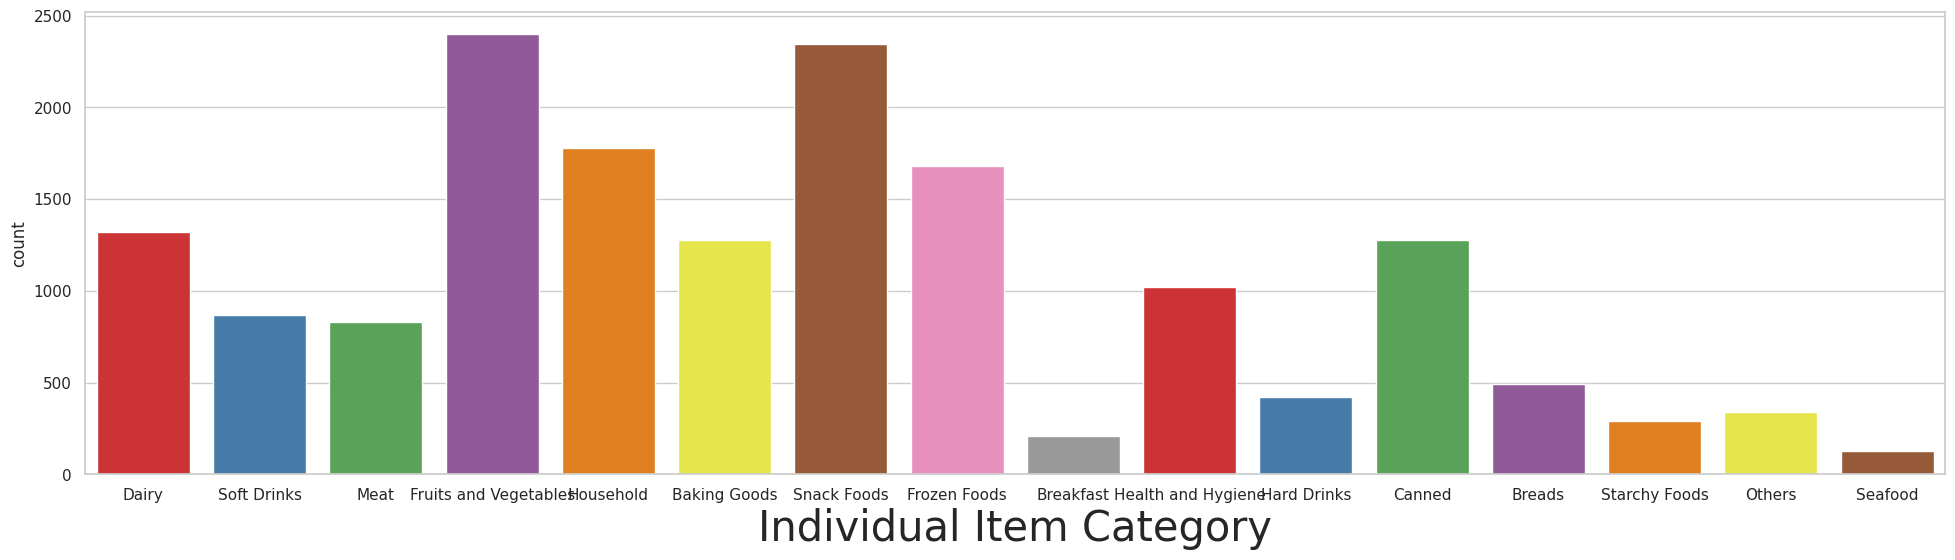

In [130]:
# COUNTPLOT FOR INDIVIDUAL ITEM CATEGORY
plt.figure(figsize=(24,6))
sns.countplot(data=data,x='Item_Type', palette='Set1')
plt.xlabel('Individual Item Category', fontsize=30)
plt.show()

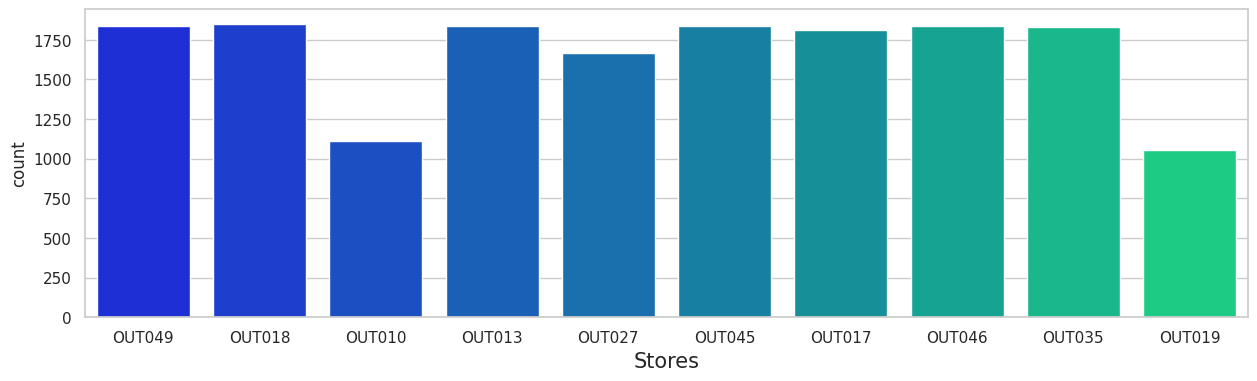

In [131]:
# COUNTPLOT for Outlet_Identifier
plt.figure(figsize=(15,4))
sns.countplot(data=data,x='Outlet_Identifier', palette='winter')
plt.xlabel('Stores', fontsize=15)
plt.show()

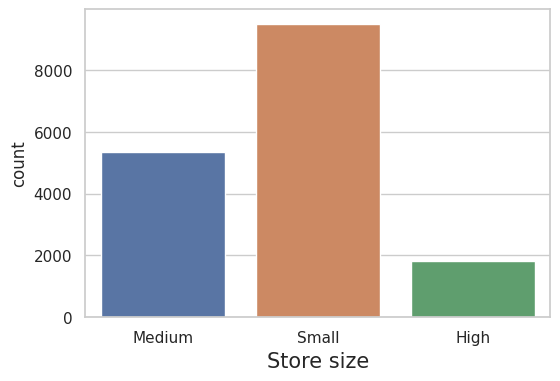

In [132]:
# COUNTPLOT for Outlet_Size
plt.figure(figsize=(6,4))
sns.countplot(data=data,x='Outlet_Size')
plt.xlabel('Store size', fontsize=15)
plt.show()

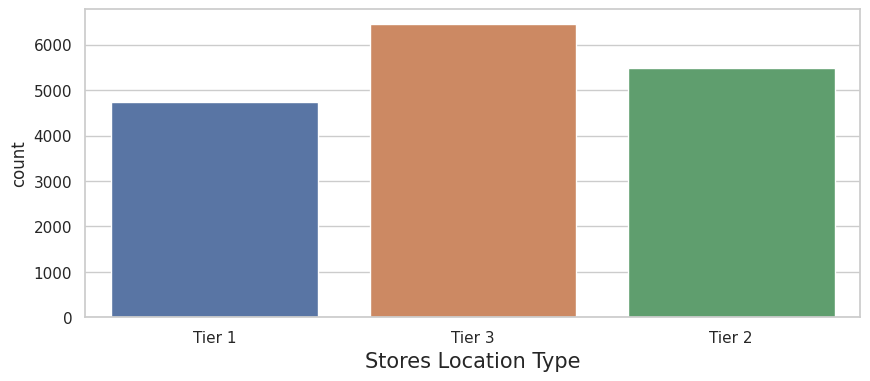

In [133]:
# COUNTPLOT for Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.countplot(data=data,x='Outlet_Location_Type')
plt.xlabel('Stores Location Type', fontsize=15)
plt.show()

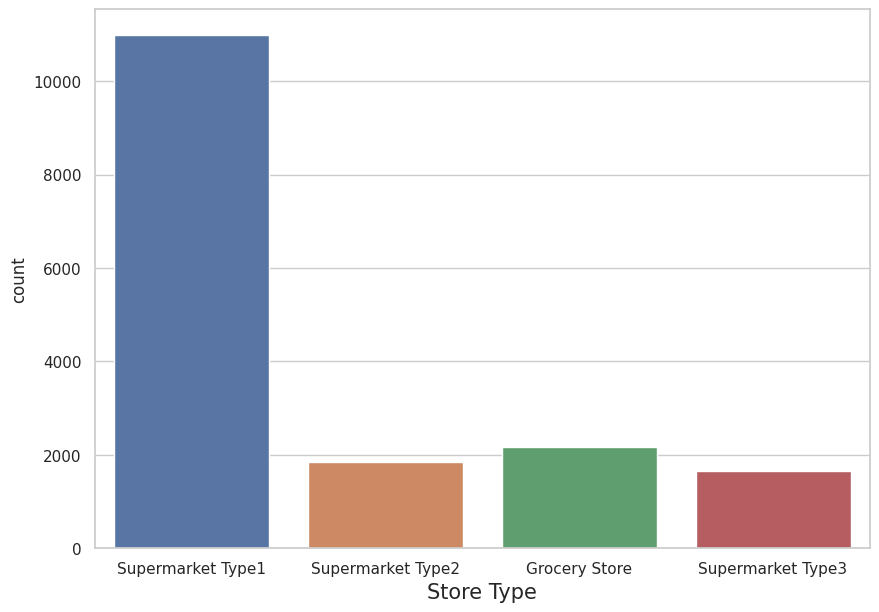

In [134]:
# COUNTPLOT for Outlet_Type
plt.figure(figsize=(10,7))
sns.countplot(data=data,x='Outlet_Type')
plt.xlabel('Store Type', fontsize=15)
plt.show()

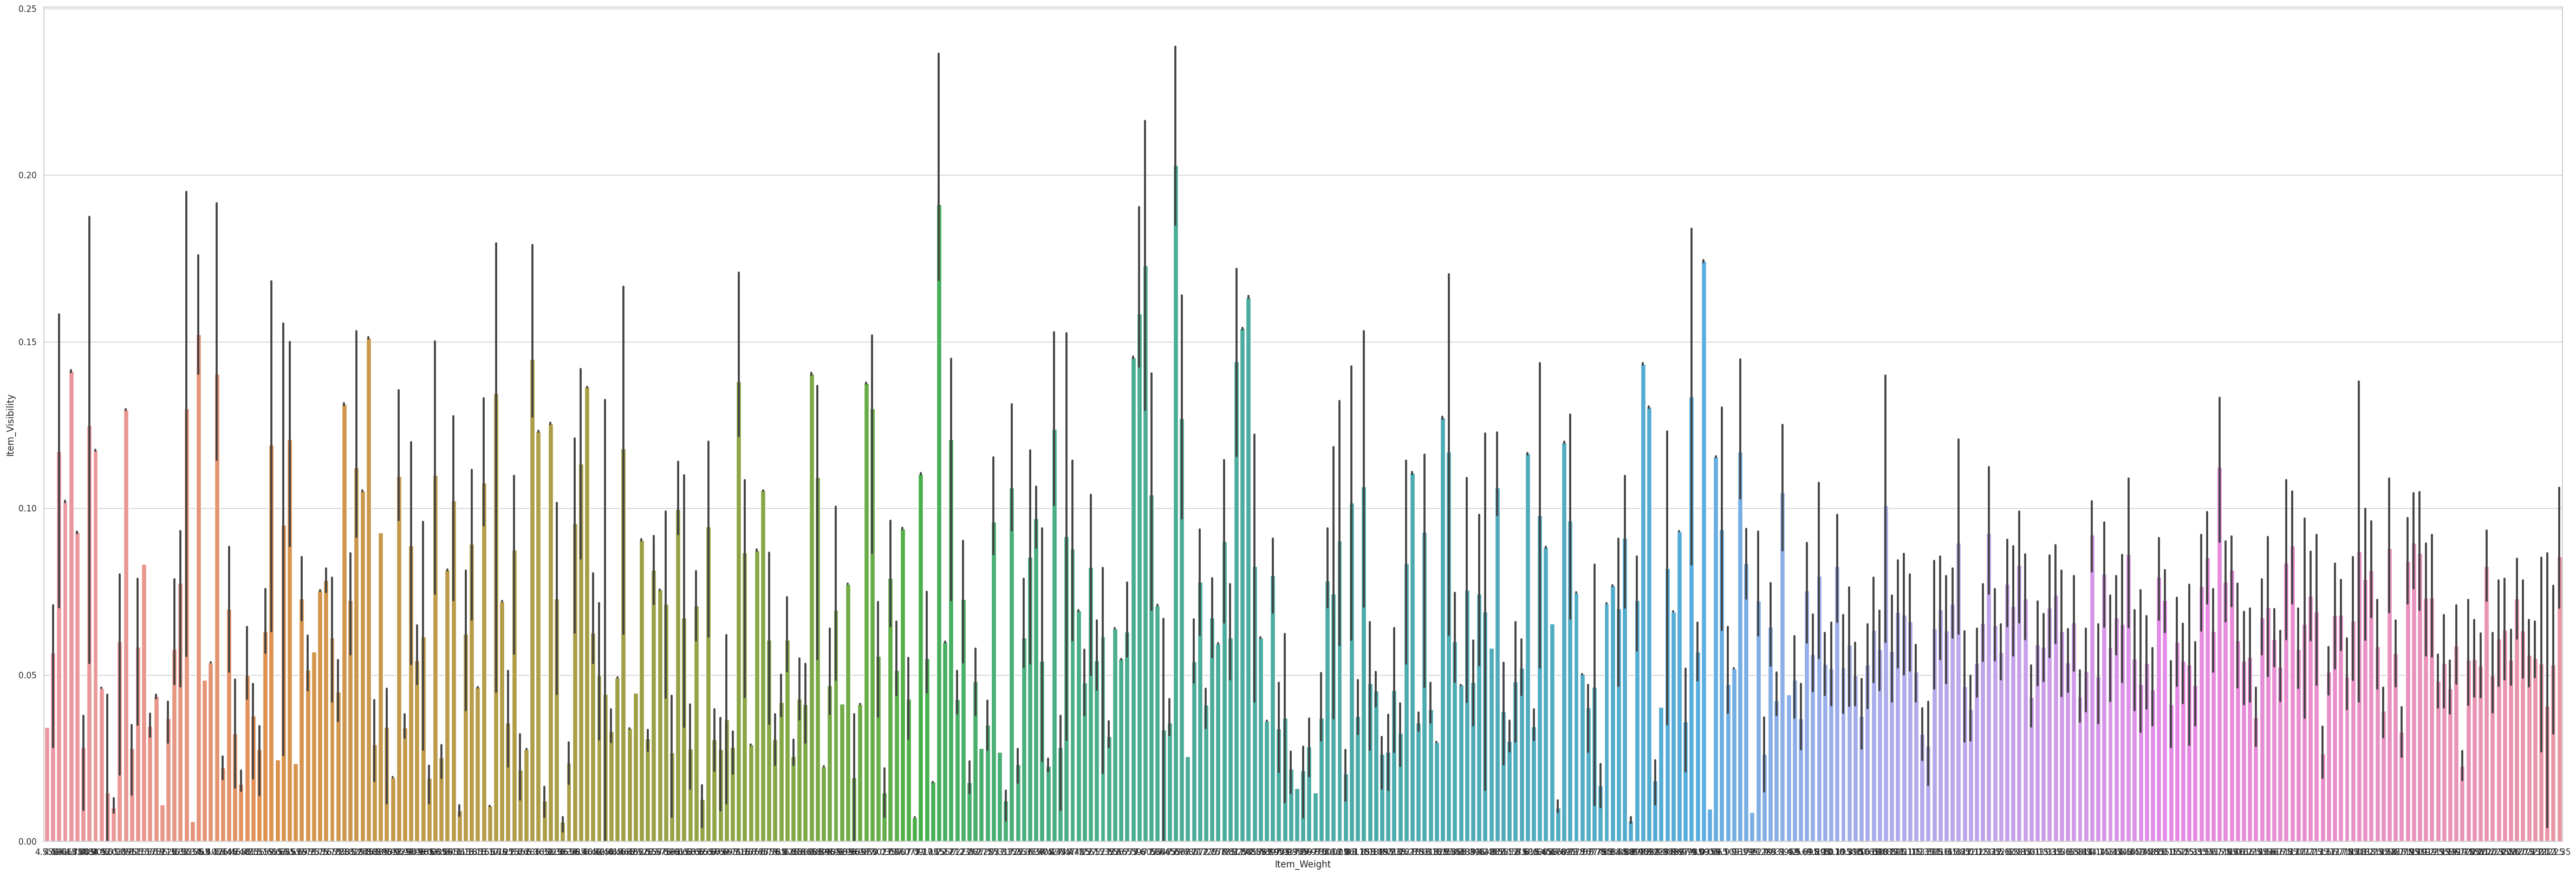

In [135]:
plt.figure(figsize=(60,20))
plot=sns.barplot(data=df,x='Item_Weight', y='Item_Visibility')


In [136]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

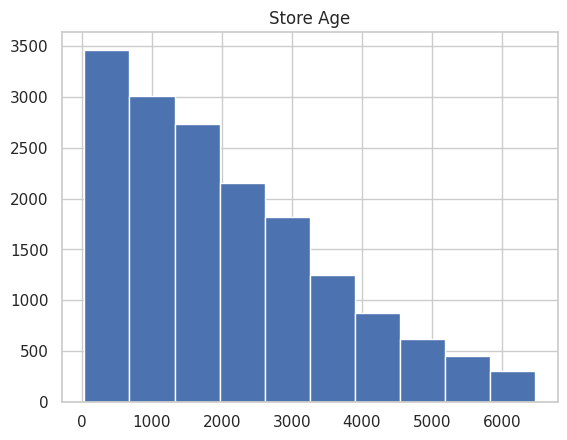

In [137]:
# For Numerical Data

# HistPlot for Outlet_Age
plt.hist(x=data['Item_Outlet_Sales'])
plt.title('Store Age')
plt.show()

# **Bivariate plots for Numerical**

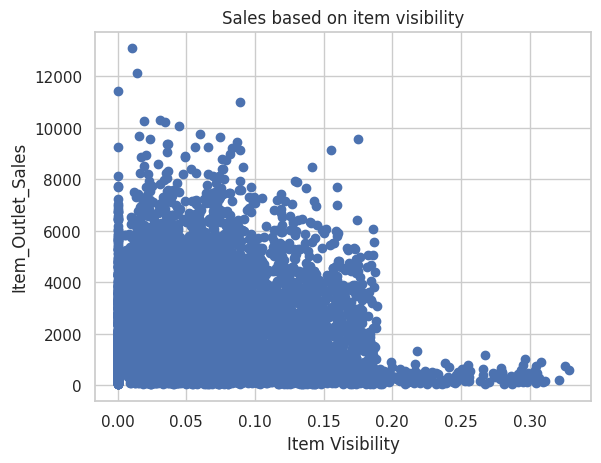

In [138]:
#   Scatter plots for Sales Per Item_Visibility
plt.scatter(df['Item_Visibility'],df['Item_Outlet_Sales'])
plt.title('Sales based on item visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

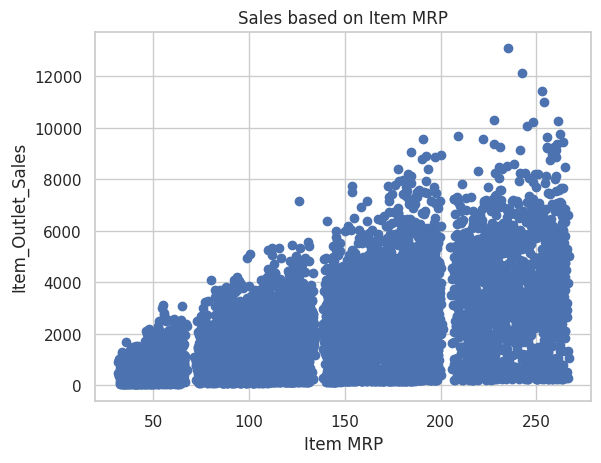

In [139]:
# Scatter plots for Sales Per Item_MRP
plt.scatter(df['Item_MRP'],df['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

# **Bivariate plots for Categorical values**

lets check for the folllowing relationship

**Sales per Item_Type_Combined**

**Sales per Outlet_Identifier**

**Sales per Outlet_Type**

**Sales per Outlet_Size**

**Sales per Outlet_Location_Type**

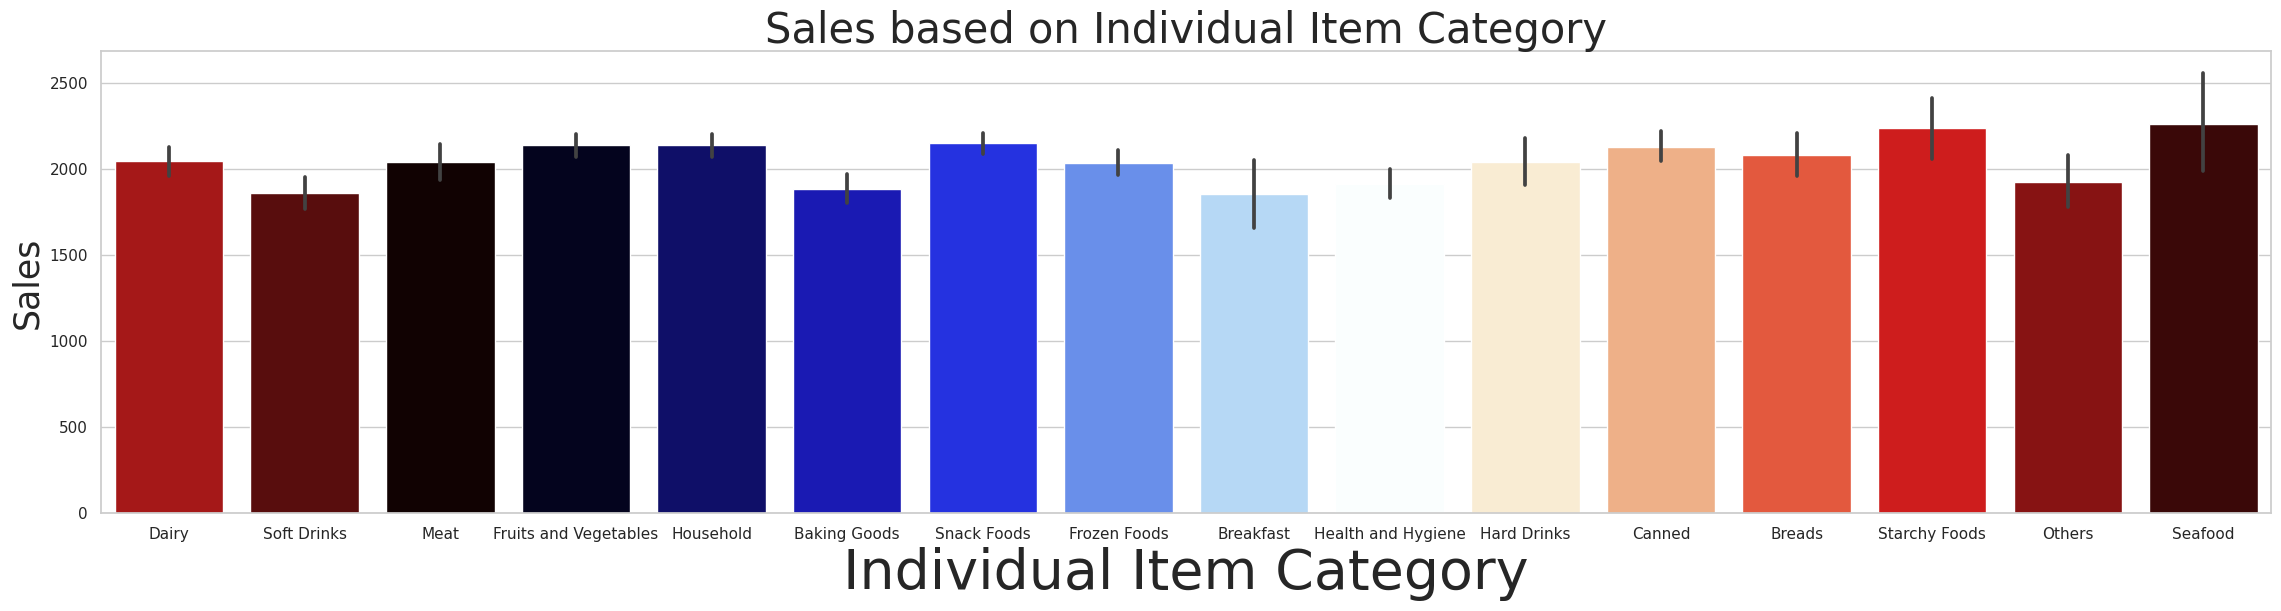

In [140]:
# Bar plot for Sale per Item_Type
plt.figure(figsize=(28,6))
sns.barplot(data=data,x='Item_Type', y='Item_Outlet_Sales', palette='flag')
plt.title('Sales based on Individual Item Category', fontsize=30)
plt.xlabel('Individual Item Category', fontsize=40)
plt.ylabel('Sales', fontsize=25)
plt.show()

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

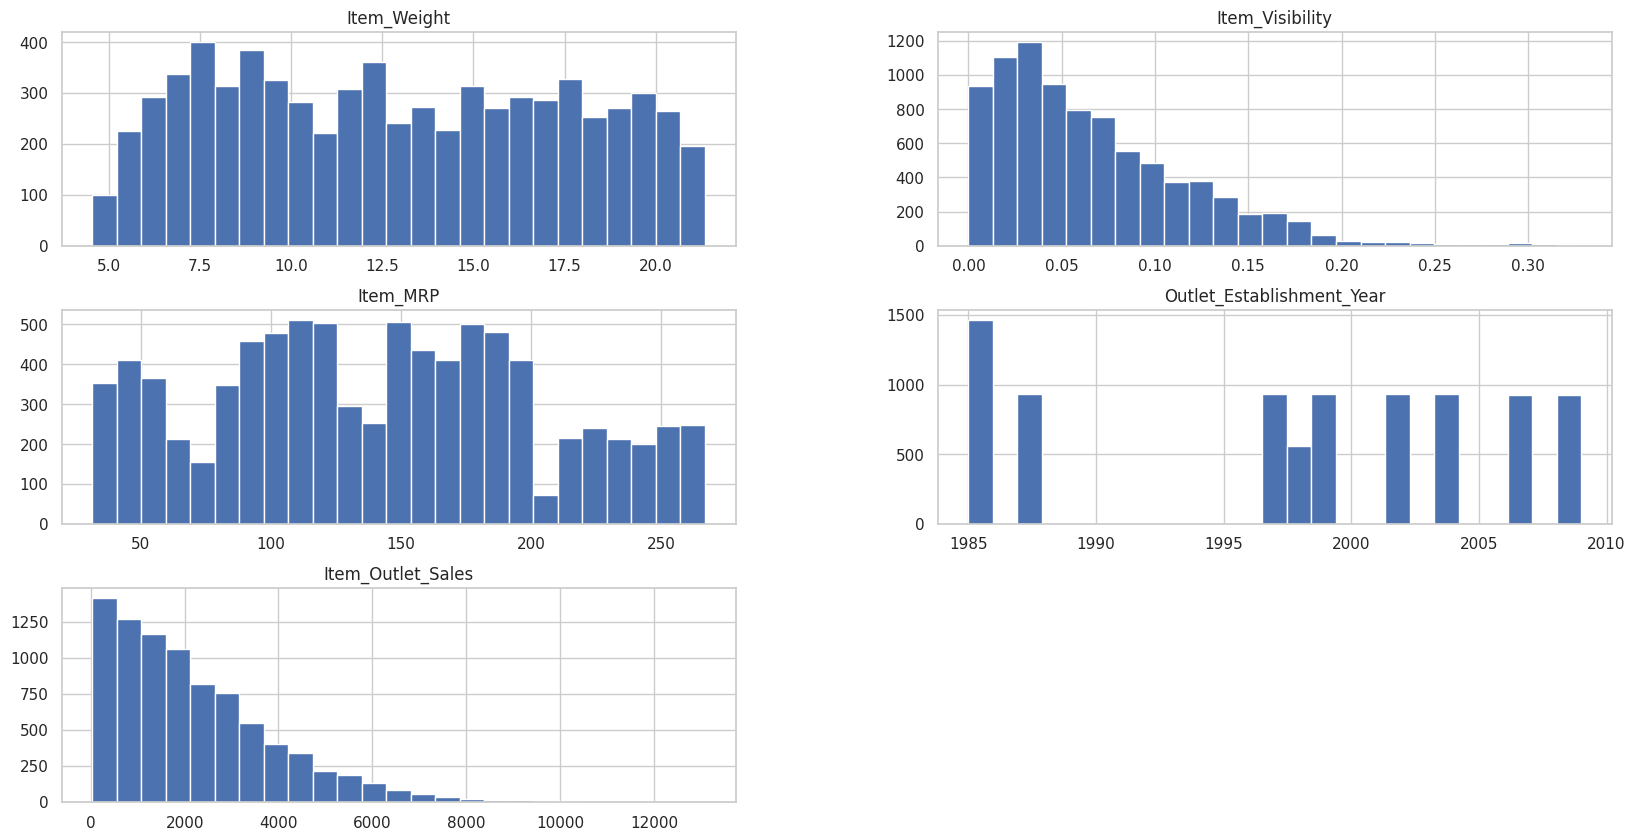

In [141]:
df.hist(bins=25, figsize=(20,10))

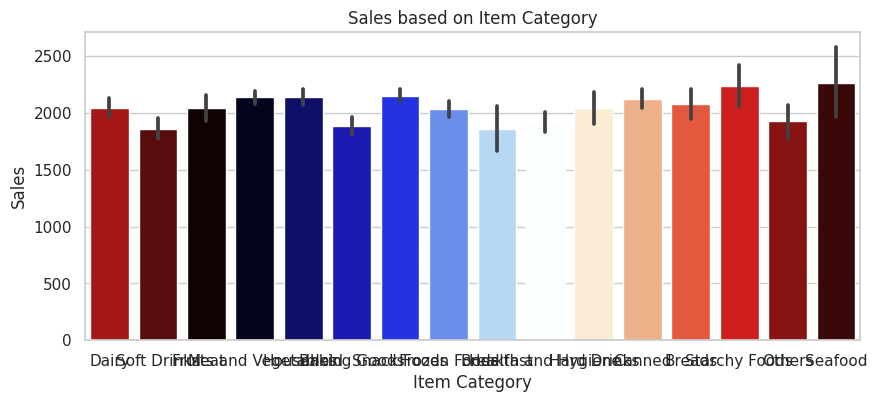

In [142]:
# Bar plot for Sale per Item_Type_Combined
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Item_Type', y='Item_Outlet_Sales', palette='flag')
plt.title('Sales based on Item Category')
plt.xlabel('Item Category')
plt.ylabel('Sales')
plt.show()

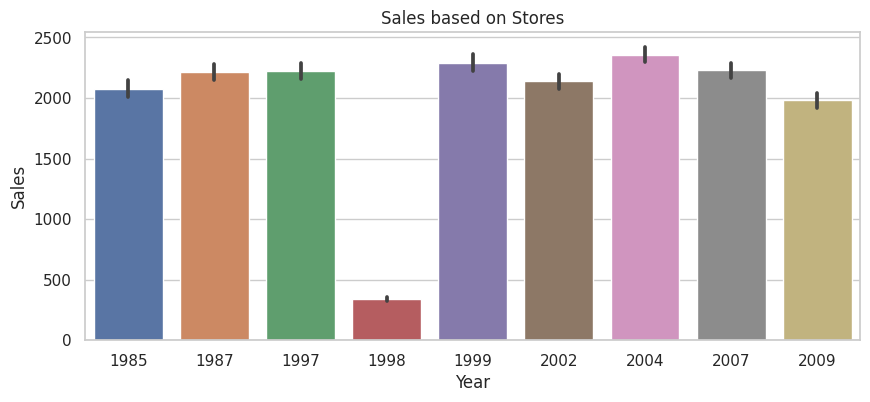

In [143]:
# Bar plot for Sale per Outlet_identifier
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Establishment_Year', y='Item_Outlet_Sales')
plt.title('Sales based on Stores')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

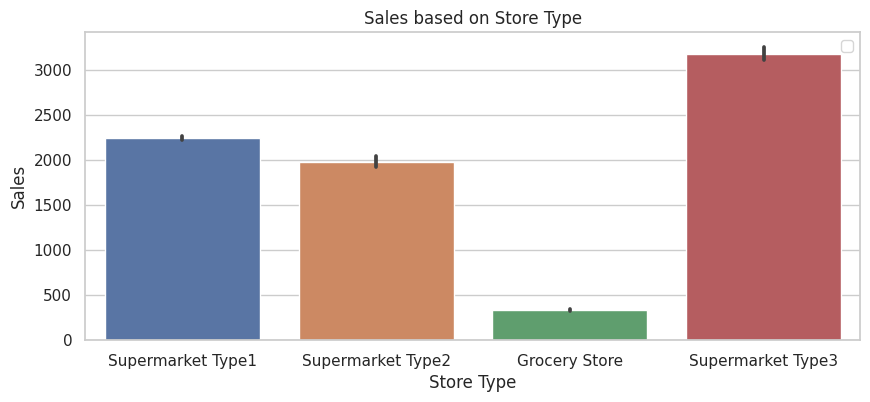

In [144]:
# Bar plot for Sale per Outlet_Type
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend()
plt.show()

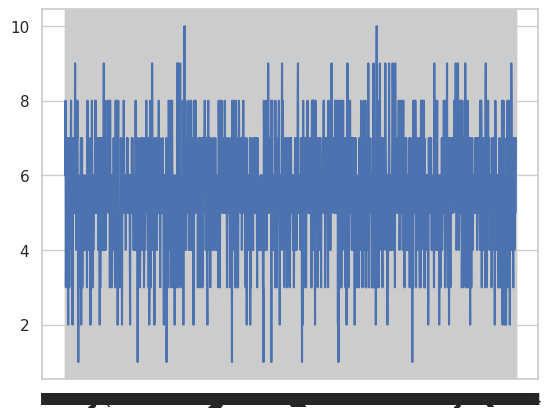

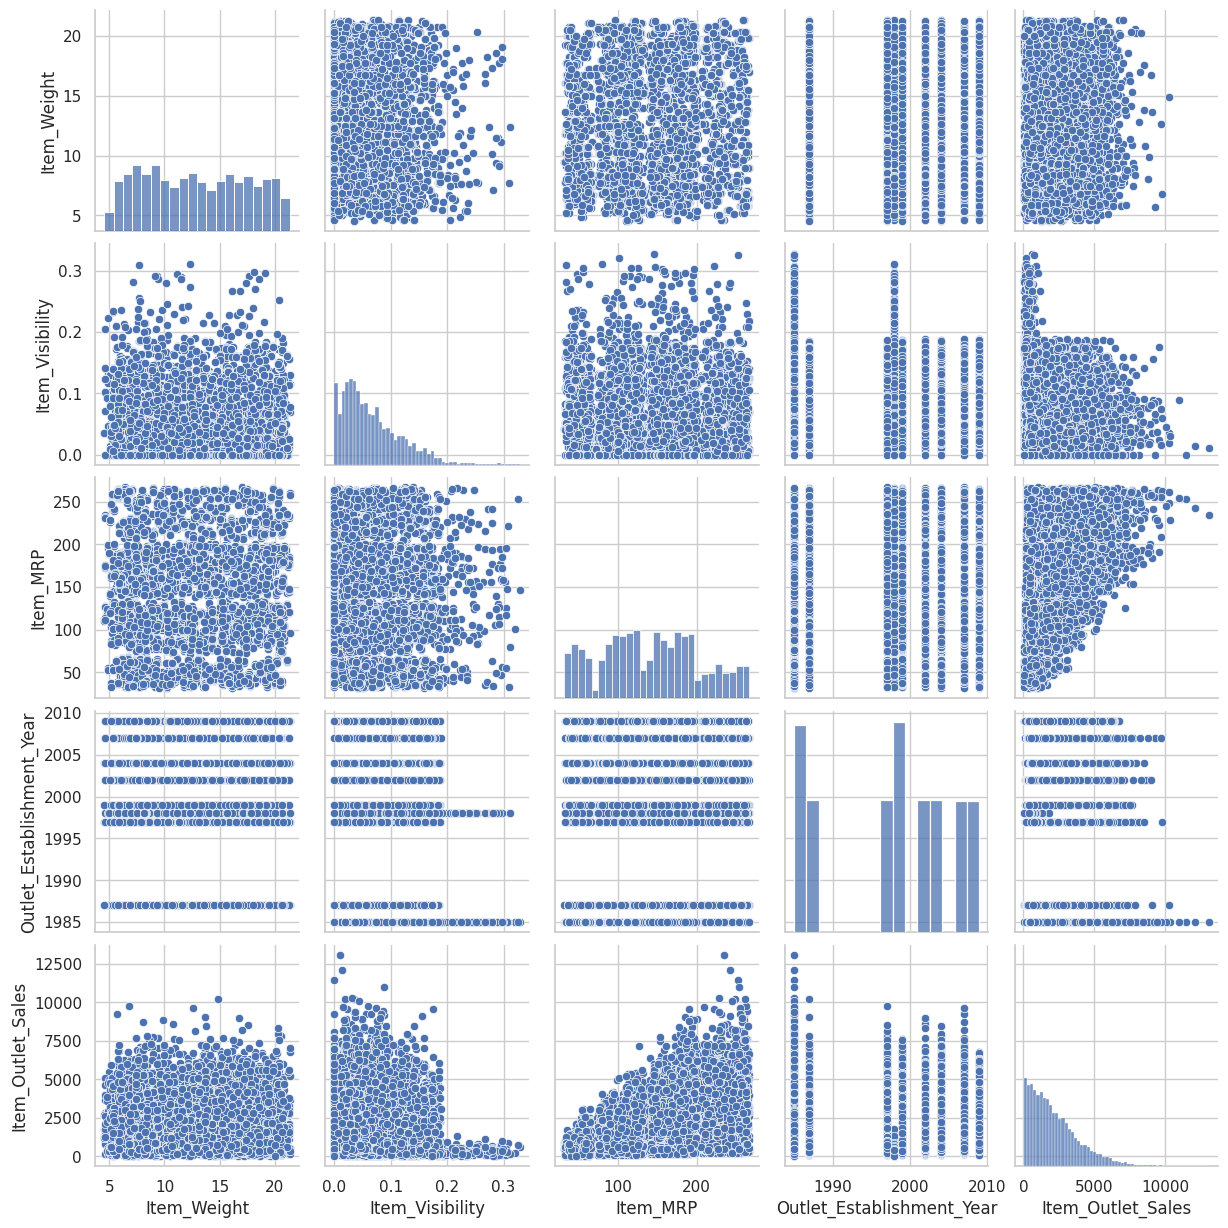

In [145]:
plt.plot(df['Item_Identifier'].value_counts().sort_index())
sns.pairplot(df)

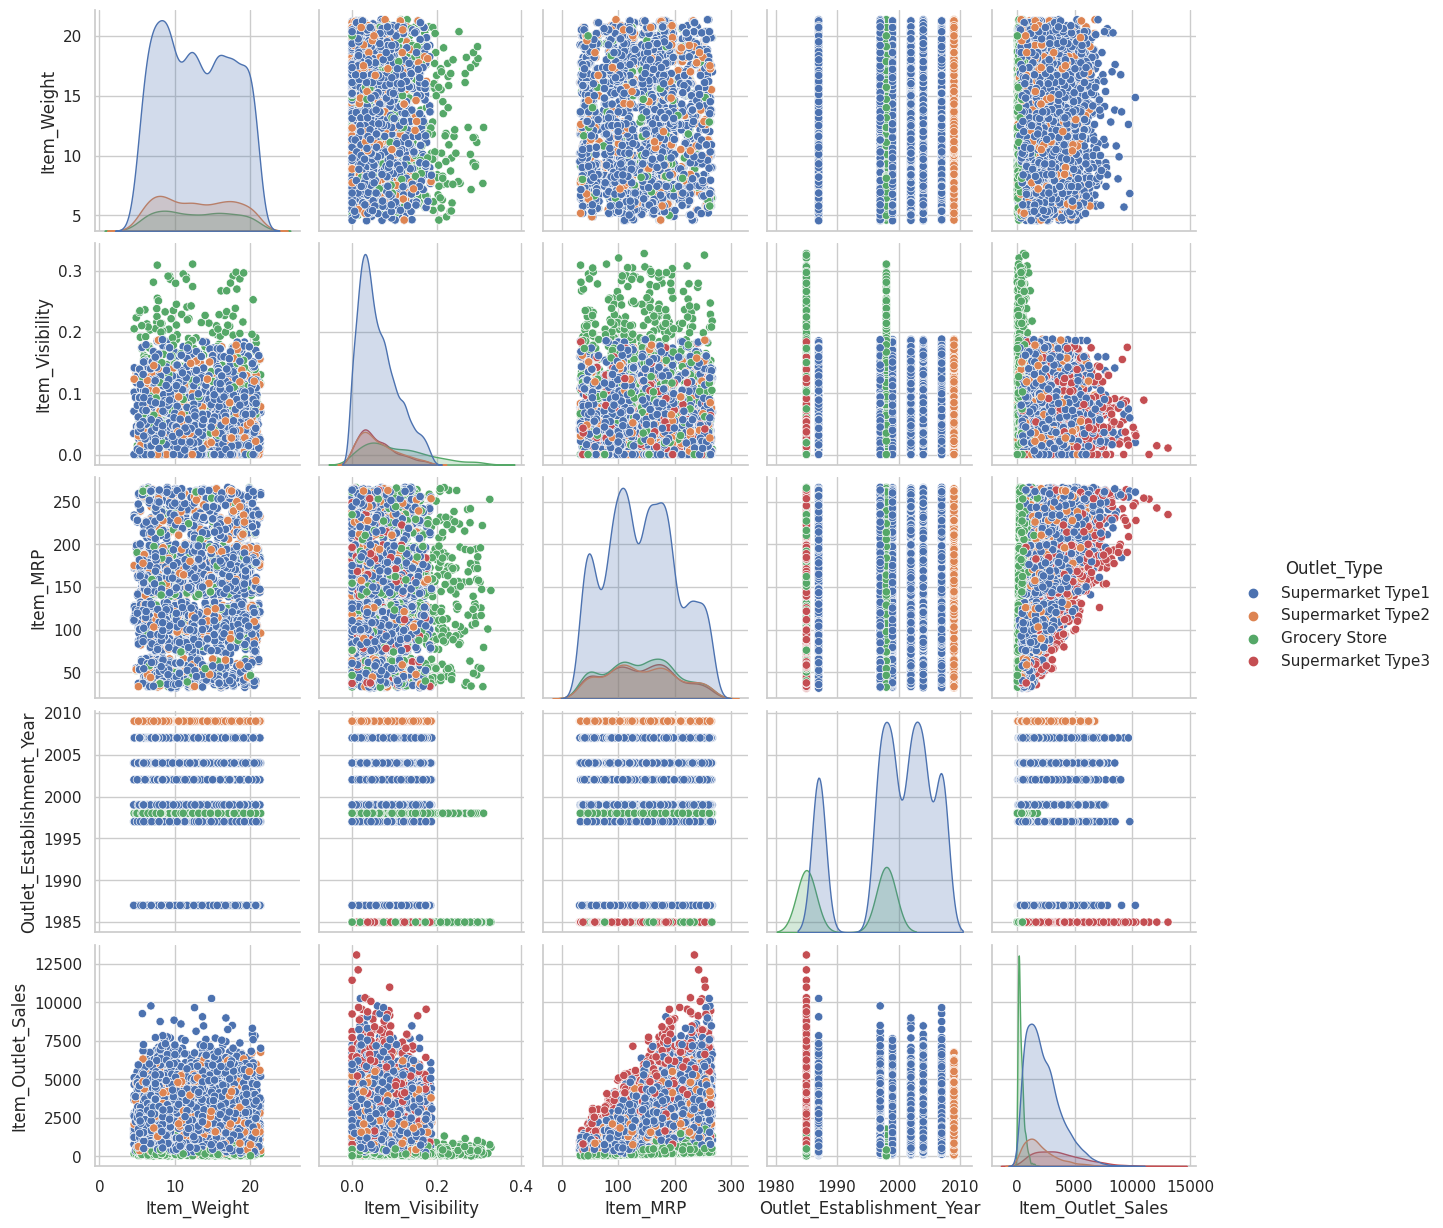

In [146]:
sns.set(style="whitegrid")
sns.pairplot(df, hue="Outlet_Type")

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

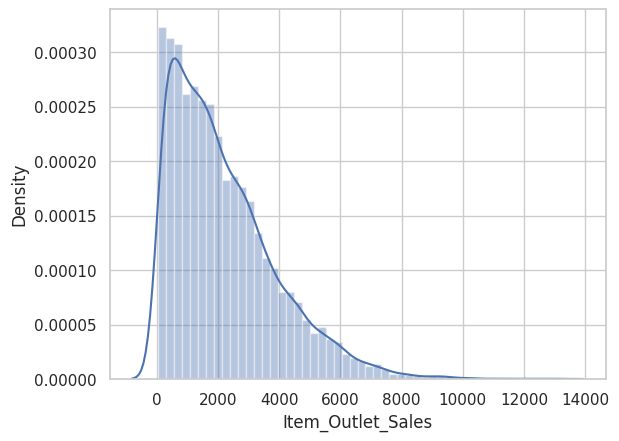

In [147]:
sns.distplot(df['Item_Outlet_Sales'], kde=True)

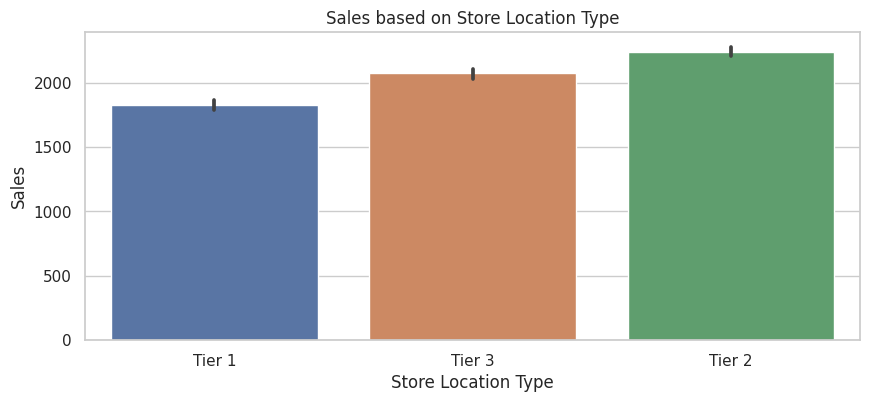

In [148]:
# Bar plot for Sale per Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store Location Type')
plt.xlabel('Store Location Type')
plt.ylabel('Sales')
plt.show()

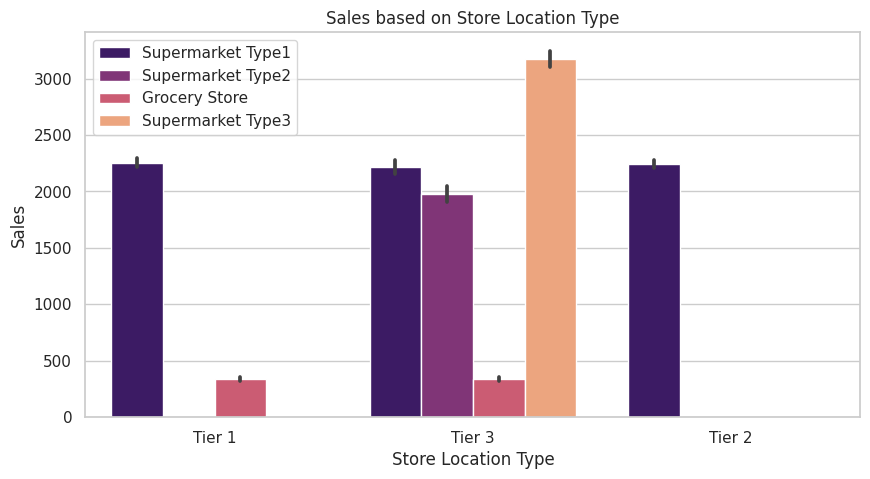

In [149]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type', palette='magma')
plt.title('Sales based on Store Location Type')
plt.xlabel('Store Location Type')
plt.ylabel('Sales')
plt.legend()
plt.show()

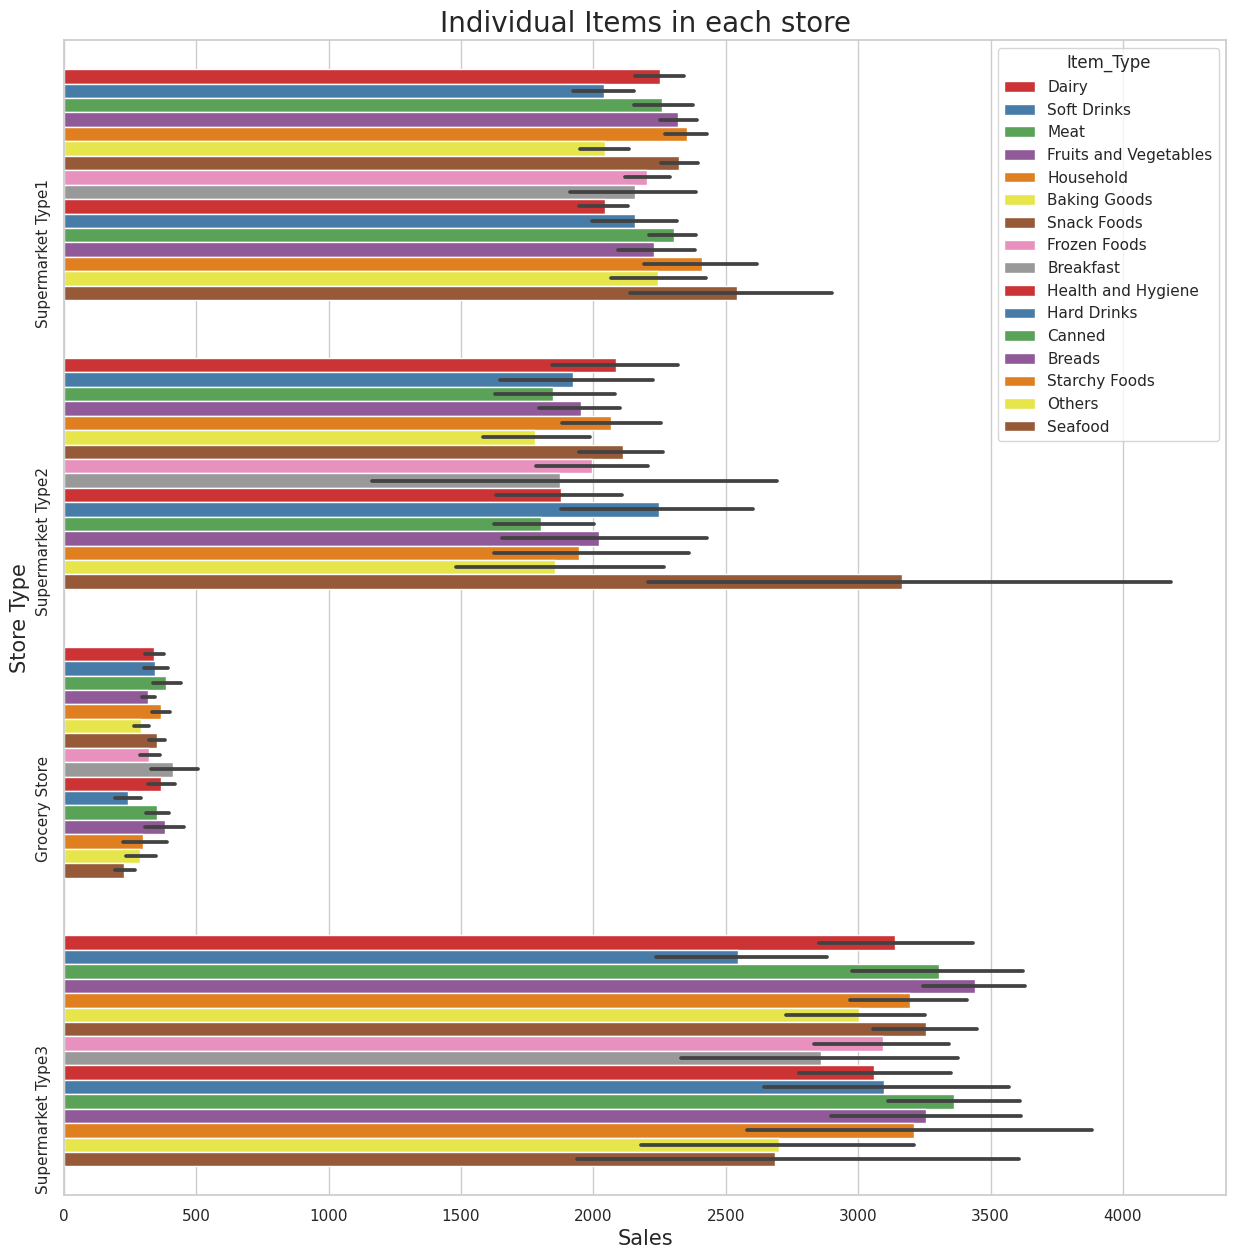

In [150]:
plt.figure(figsize=(15,15))
sns.barplot(data=data,x='Item_Outlet_Sales', y='Outlet_Type',hue='Item_Type', palette='Set1')
plt.title('Individual Items in each store', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Store Type', fontsize=15)
plt.yticks(rotation=90)
plt.show()

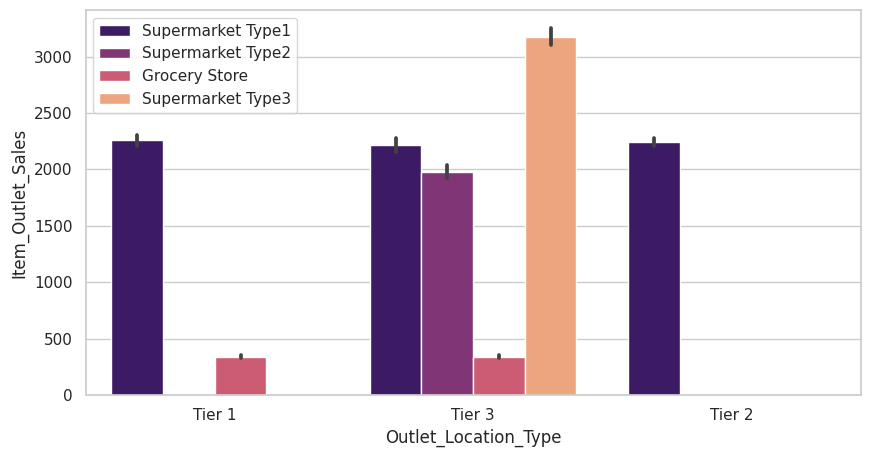

In [151]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type', palette='magma')
plt.legend()
plt.show()
import warnings
warnings.filterwarnings("ignore")

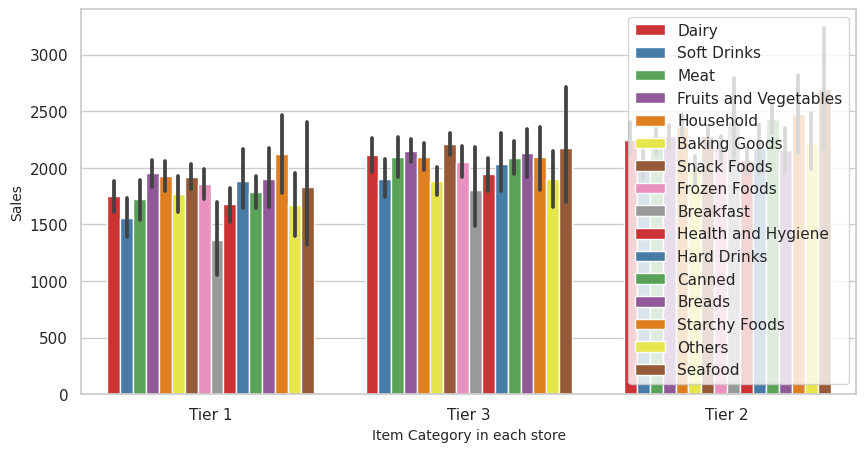

In [152]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Item_Type', palette='Set1')
plt.xlabel('Item Category in each store', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.legend()
plt.show()

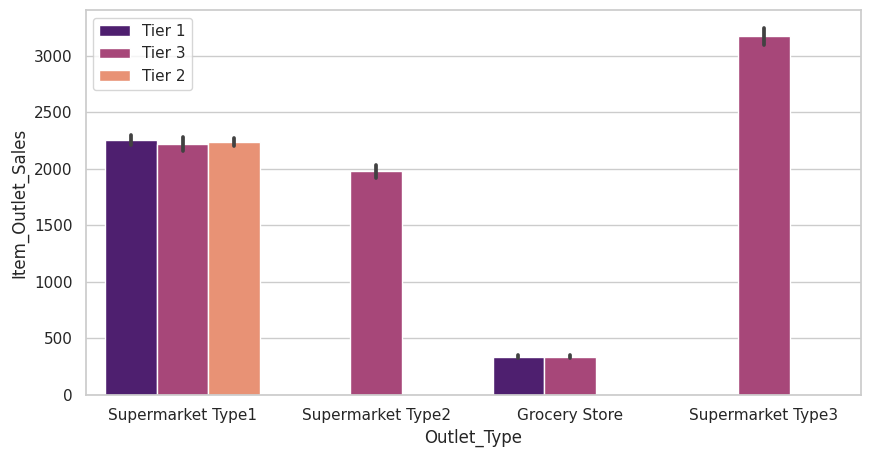

In [153]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Outlet_Type', y='Item_Outlet_Sales',hue='Outlet_Location_Type', palette='magma')
plt.legend()

<Axes: >

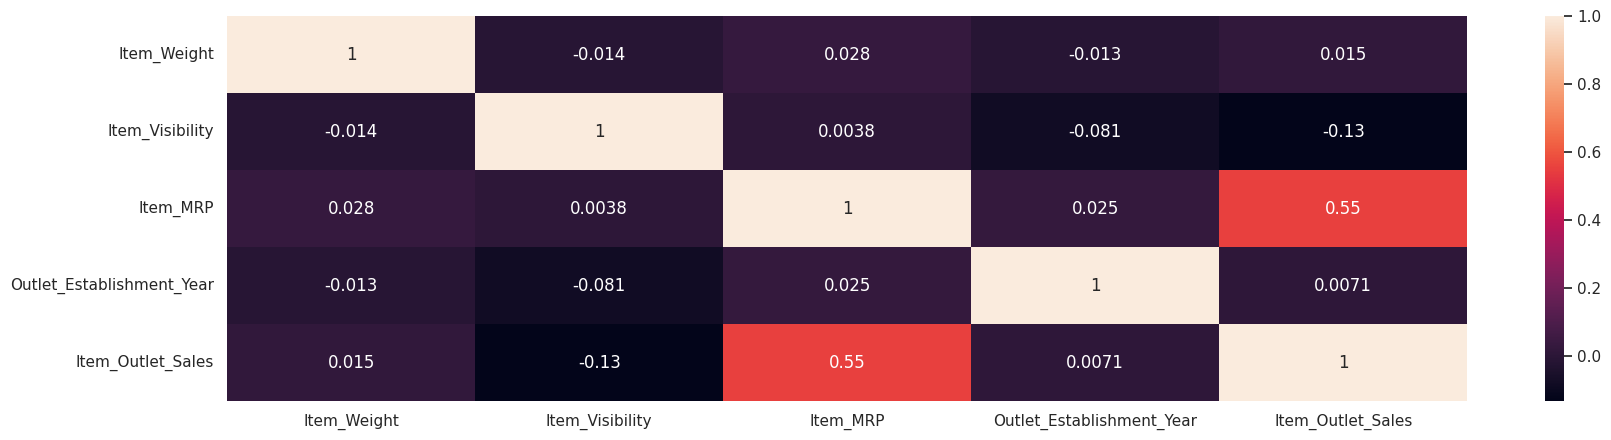

In [154]:
# Correlation Matrix
plt.figure(figsize=(20,5))
sns.heatmap(data.corr(numeric_only=True), annot=True)

<Axes: >

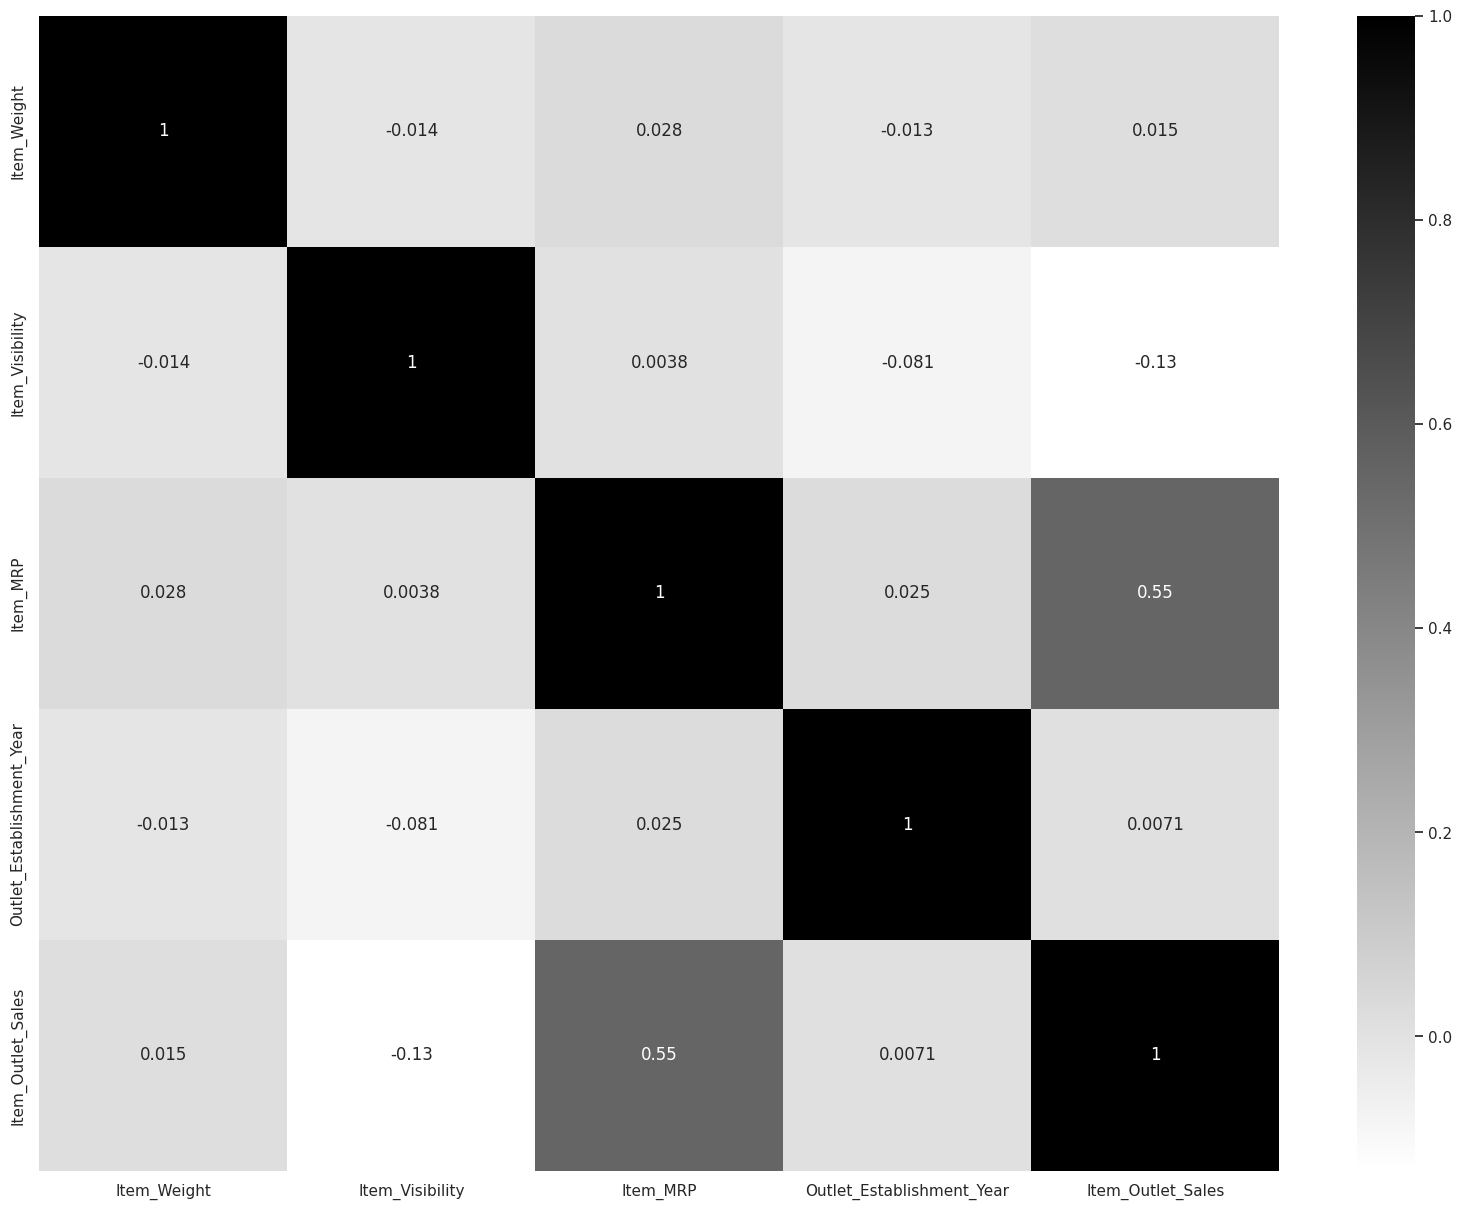

In [155]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="gray_r")

# **Feature Engineering**

* Categorical Encoding
* variable Transformation
* Outlier Engineering
* Date and Time Engineering

# **Label Encoding**

In [156]:
# Label Encoding for Ordinal Data
le = LabelEncoder()
label = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size']
for i in label:
    data[i] = le.fit_transform(data[i])
data.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156         9.30                 0         0.016047          4   
1                8         5.92                 1         0.019278         14   
2              662        17.50                 0         0.016760         10   
3             1121        19.20                 1         0.000000          6   
4             1297         8.93                 0         0.000000          9   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092            OUT049                       1999            1   
1   48.2692            OUT018                       2009            1   
2  141.6180            OUT049                       1999            1   
3  182.0950            OUT010                       1998            2   
4   53.8614            OUT013                       1987            0   

   Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales source  \
0                     0  Supermarket Type1          3735.1380     df   
1                     2  Supermarket Type2           443.4228     df   
2                     0  Supermarket Type1          2097.2700     df   
3                     2      Grocery Store           732.3800     df   
4                     2  Supermarket Type1           994.7052     df   

  Item_Type_Combined  
0               Food  
1             Drinks  
2               Food  
3               Food  
4     Non-Consumable

In [157]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [158]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales source  
0  Supermarket Type1          3735.1380     df  
1  Supermarket Type2           443.4228     df  
2  Supermarket Type1          2097.2700     df  
3      Grocery Store           732.3800     df  
4  Supermarket Type1           994.7052     df

# **One Hot Encoding**

In [159]:
# One hot encoding for Nominal data
# Column for applying the one hot encoding
from sklearn.preprocessing import OneHotEncoder
cols = ['Item_Type']

# Applying the One Hot Encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_oh = pd.DataFrame(OH_encoder.fit_transform(data[cols])).astype('int64')

# Get feature columns
data_oh.columns = OH_encoder.get_feature_names_out(cols)

#One hot encoding removed index, put it back
data_oh.index = data.index

# Add one hot encoded columns to our main df new name: tr_fe, te_fe
data_fe = pd.concat([data, data_oh], axis=1)
data_fe.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156         9.30                 0         0.016047          4   
1                8         5.92                 1         0.019278         14   
2              662        17.50                 0         0.016760         10   
3             1121        19.20                 1         0.000000          6   
4             1297         8.93                 0         0.000000          9   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092            OUT049                       1999            1   
1   48.2692            OUT018                       2009            1   
2  141.6180            OUT049                       1999            1   
3  182.0950            OUT010                       1998            2   
4   53.8614            OUT013                       1987            0   

   Outlet_Location_Type  ... Item_Type_6  Item_Type_7 Item_Type_8 Item_Type_9  \
0                     0  ...           0            0           0           0   
1                     2  ...           0            0           0           0   
2                     0  ...           0            0           0           0   
3                     2  ...           1            0           0           0   
4                     2  ...           0            0           0           1   

   Item_Type_10  Item_Type_11  Item_Type_12  Item_Type_13  Item_Type_14  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             1             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Item_Type_15  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 30 columns]

In [160]:
# One hot coding 
data = pd.get_dummies(data_fe, columns=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type'])

In [161]:
data_fe.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156         9.30                 0         0.016047          4   
1                8         5.92                 1         0.019278         14   
2              662        17.50                 0         0.016760         10   
3             1121        19.20                 1         0.000000          6   
4             1297         8.93                 0         0.000000          9   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092            OUT049                       1999            1   
1   48.2692            OUT018                       2009            1   
2  141.6180            OUT049                       1999            1   
3  182.0950            OUT010                       1998            2   
4   53.8614            OUT013                       1987            0   

   Outlet_Location_Type  ... Item_Type_6  Item_Type_7 Item_Type_8 Item_Type_9  \
0                     0  ...           0            0           0           0   
1                     2  ...           0            0           0           0   
2                     0  ...           0            0           0           0   
3                     2  ...           1            0           0           0   
4                     2  ...           0            0           0           1   

   Item_Type_10  Item_Type_11  Item_Type_12  Item_Type_13  Item_Type_14  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             1             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Item_Type_15  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 30 columns]

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type',
 'Item_Outlet_Sales',
 'source']

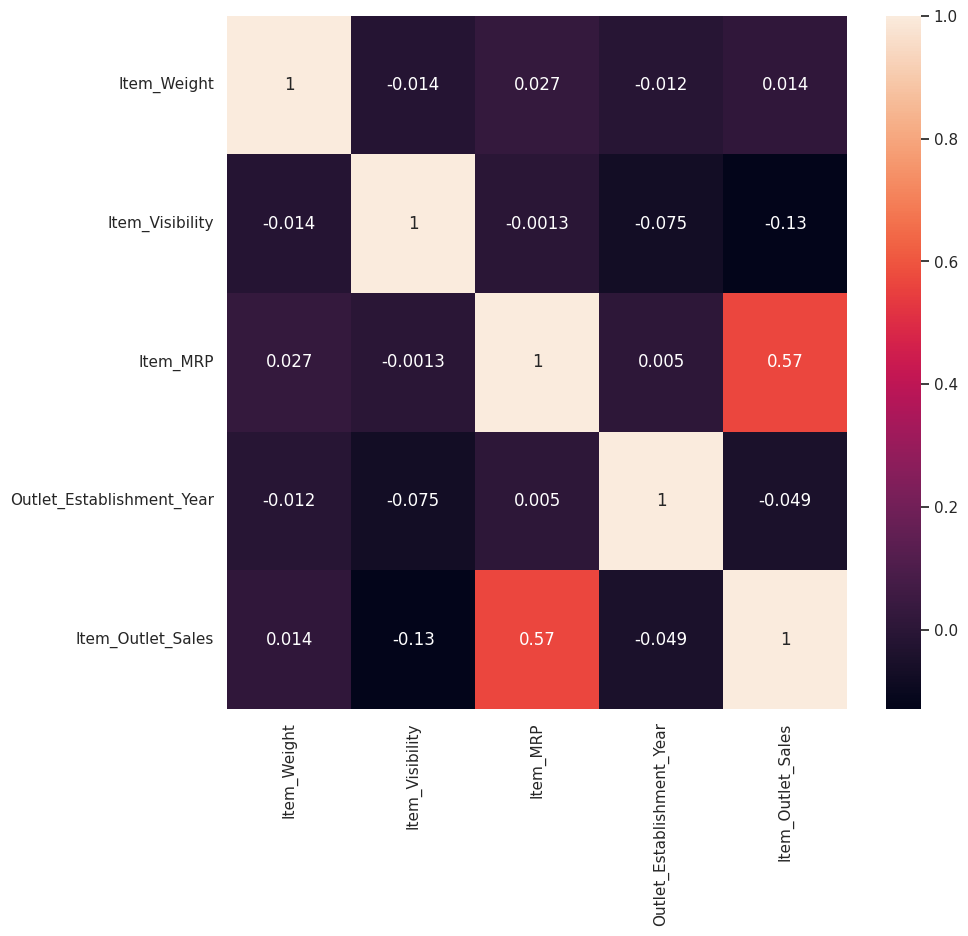

In [162]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(numeric_only=True), annot=True)
['Item_Identifier','Item_Weight','Item_Fat_Content',
 'Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier',
 'Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Outlet_Sales','source']

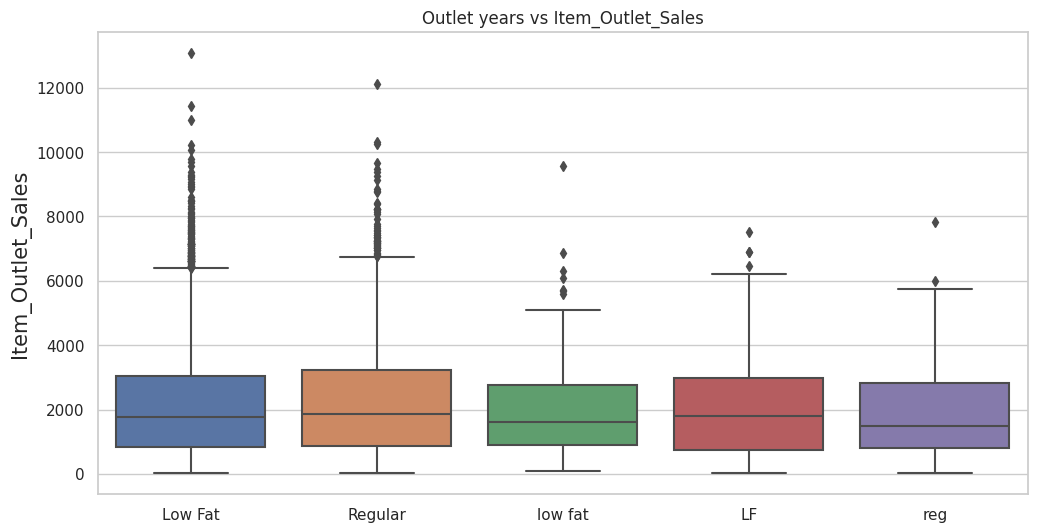

In [163]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=df,x='Item_Fat_Content', y='Item_Outlet_Sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.set_title('Outlet years vs Item_Outlet_Sales')
plt.xlabel('', fontsize=15)
plt.ylabel('Item_Outlet_Sales', fontsize=15)
plt.show()

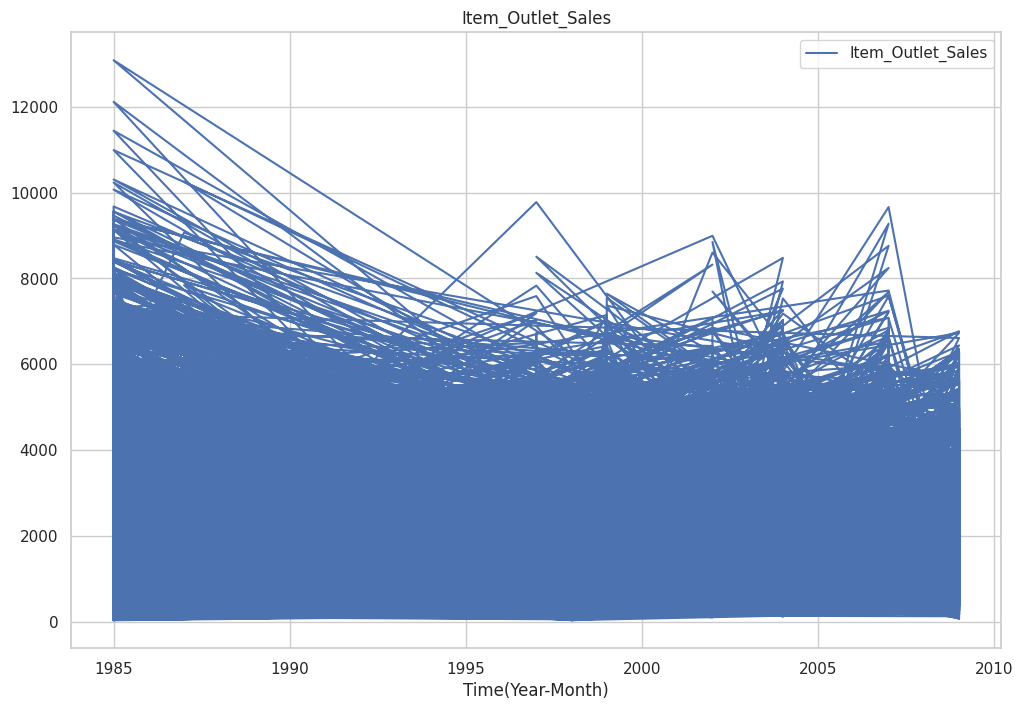

In [164]:
df.index = df['Outlet_Establishment_Year']
df = df.loc[:,['Item_Outlet_Sales']]
ts = df['Item_Outlet_Sales']
plt.figure(figsize=(12,8))
plt.plot(ts, label="Item_Outlet_Sales")
plt.title('Outlet Establishment Year')
plt.xlabel('Time(Year-Month)')
plt.title('Item_Outlet_Sales')
plt.legend(loc='best')
plt.show()

<Axes: xlabel='Outlet_Establishment_Year'>

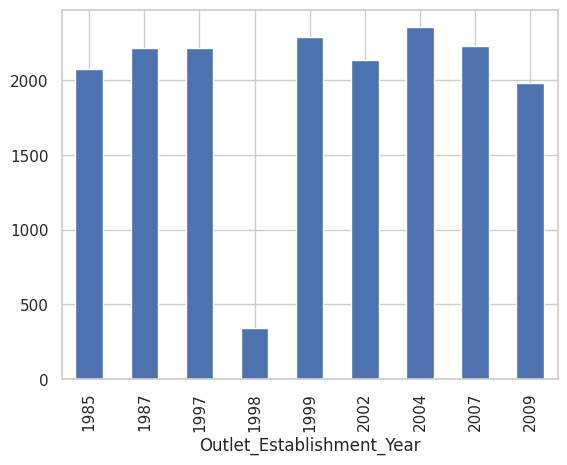

In [165]:
data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

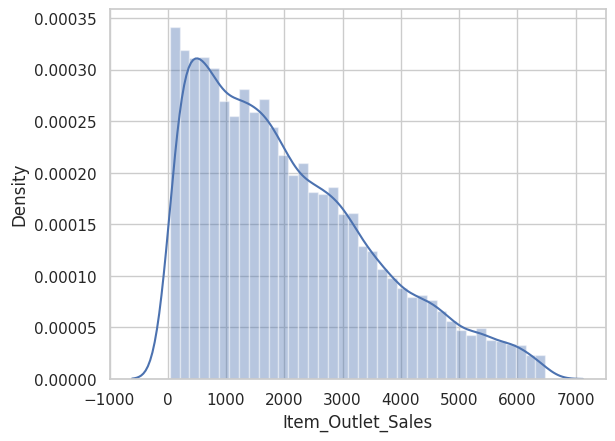

In [166]:
sns.distplot(data['Item_Outlet_Sales'])

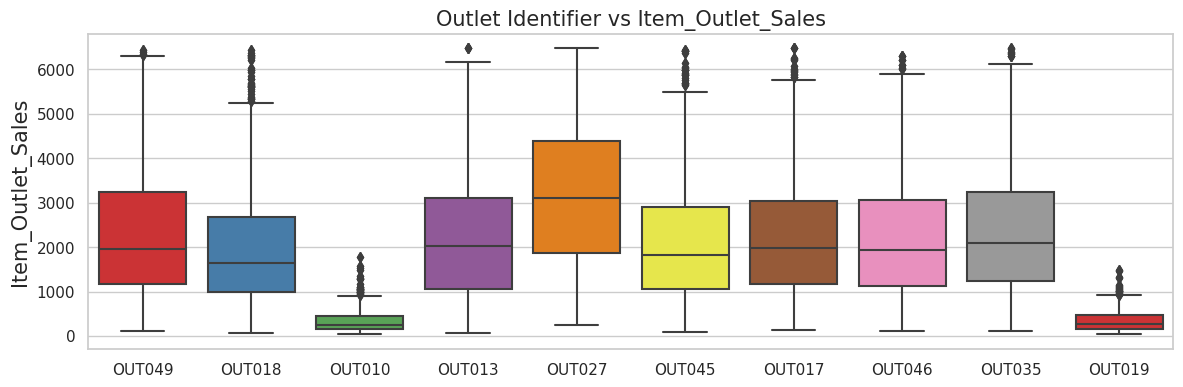

In [167]:
plt.figure(figsize=(14,9))
plt.subplot(211)
ax = sns.boxplot(data=data,x='Outlet_Identifier', y='Item_Outlet_Sales', palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.set_title('Outlet Identifier vs Item_Outlet_Sales', fontsize=15)
plt.xlabel('', fontsize=15)
plt.ylabel('Item_Outlet_Sales', fontsize=15)
plt.show()

In [168]:
data.dtypes

Item_Identifier                    int64
Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Outlet_Identifier                 object
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
source                            object
Item_Type_Combined                object
Item_Type_0                        int64
Item_Type_1                        int64
Item_Type_2                        int64
Item_Type_3                        int64
Item_Type_4                        int64
Item_Type_5                        int64
Item_Type_6                        int64
Item_Type_7                        int64
Item_Type_8                        int64
Item_Type_9                        int64
Item_Type_10                       int64
Item_Type_11                       int64
Item_Type_12                       int64
Item_Type_13                       int64
Item_Type_14                       int64
Item_Type_15    

# **Splitting the dataset into train and test**

# Data Preprocessing

In [169]:
X = df.drop('Item_Outlet_Sales', axis=1)
Y = df['Item_Outlet_Sales']

In [170]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, random_state=101)

In [171]:
X_Train.shape

(6392, 0)

In [172]:
X_Test.shape

(2131, 0)

In [173]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']
X_Train, X_Test, y_Train, y_Test = train_test_split(X,y,train_size=0.700, random_state=100)

In [174]:
X_Train.shape

(5966, 0)

In [175]:
X_Test.shape

(2557, 0)

In [176]:
df.columns

Index(['Item_Outlet_Sales'], dtype='object')

In [177]:
X_Test.head()

Empty DataFrame
Columns: []
Index: [1987, 2007, 1985, 2007, 1997]

In [178]:
# Drop irrelevent columns
data_fe = data_fe.drop(['Item_Identifier','Outlet_Identifier','Item_Fat_Content',
 'Item_Visibility','Item_Type',
 'Outlet_Establishment_Year'], axis=1)
data_fe.head()

# Divide Data into train and test
train = data_fe.loc[data_fe['source']=="train"]
test = data_fe.loc[data_fe['source']=="test"]

train = train.drop('source', axis = 1)
test = test.drop(['source','Item_Outlet_Sales'], axis = 1)

# Check datasets
print('\nTrain dataset for model building: \n')
print(train.info(verbose=True, show_counts=True))
print('\nTest dataset for model building: \n')
print(test.info(verbose=True, show_counts=True))
train.head()


Train dataset for model building: 

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           0 non-null      float64
 1   Item_MRP              0 non-null      float64
 2   Outlet_Size           0 non-null      int64  
 3   Outlet_Location_Type  0 non-null      int64  
 4   Outlet_Type           0 non-null      object 
 5   Item_Outlet_Sales     0 non-null      float64
 6   Item_Type_Combined    0 non-null      object 
 7   Item_Type_0           0 non-null      int64  
 8   Item_Type_1           0 non-null      int64  
 9   Item_Type_2           0 non-null      int64  
 10  Item_Type_3           0 non-null      int64  
 11  Item_Type_4           0 non-null      int64  
 12  Item_Type_5           0 non-null      int64  
 13  Item_Type_6           0 non-null      int64  
 14  Item_Type_7           0 non-null      int64  
 15  Ite

Empty DataFrame
Columns: [Item_Weight, Item_MRP, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales, Item_Type_Combined, Item_Type_0, Item_Type_1, Item_Type_2, Item_Type_3, Item_Type_4, Item_Type_5, Item_Type_6, Item_Type_7, Item_Type_8, Item_Type_9, Item_Type_10, Item_Type_11, Item_Type_12, Item_Type_13, Item_Type_14, Item_Type_15]
Index: []

[0 rows x 23 columns]

In [179]:
# Train and Test split
X = df.drop("Item_Outlet_Sales", axis=1)
y = df["Item_Outlet_Sales"]
X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,train_size=0.700,random_state=100)

def cross_val(model, X, y, cv):
    scores = CVS(model, X, y, cv=cv)
    print(f'{model} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model} score: {round(scores.mean(),4)}')

In [180]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold

pipeline_lr = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="constant", fill_value="1")),
        ("VarianceThreshold", VarianceThreshold(threshold=0.1)),
        ("scalar1", StandardScaler()),
        ("pca1", PCA(n_components=2)),
        ("lr_classifier", DecisionTreeClassifier())
    ]
)

pipeline_dt = Pipeline(
    [
        ("scalar2", StandardScaler()),
        ("VarianceThreshold", VarianceThreshold(threshold=0.1)),
        ("pca2", PCA(n_components=2)),
        ("dt_classifier", DecisionTreeClassifier())
    ]

)

pipeline_randomforest = Pipeline(
    [
        ("scalar3", StandardScaler()),
        ("pca3", PCA(n_components=2)),
        ("rf_classifier", RandomForestClassifier())
    ]

)


# **Data Modeling**

In [181]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X,y = make_classification(random_state=0)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

pipe = Pipeline([('scalar',StandardScaler()), ('svc', SVC())])

# The pipeline can be used as any other estimator and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)
Pipeline(steps=[('scalar',StandardScaler()), ('svc', SVC())])
pipe.score(X_test, y_test)

0.88

## **Pipeline to link all steps of data manipulation together to create pipeline**

# **LINEAR REGRESSION**

In [182]:
# Model
import warnings
warnings.filterwarnings("ignore")
model = LinearRegression()

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics for Regression
LR_MAE = MAE(y_test, y_predict)
LR_MSE = MSE(y_test, y_predict)
LR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Squared Mean Squared Error: {np.sqrt(LR_MSE)}\n")
print(f" R^2 Score: {LR_R_2}\n")

# Cross Validation Score check
cross_val(LinearRegression(),X,y,5)

 Mean Absolute Error: 0.28405819762384327

 Squared Mean Squared Error: 0.3510867134035248

 R^2 Score: 0.5061623384275291

LinearRegression() Scores:
0.28
0.34
0.31
-0.01
0.38
Average LinearRegression() score: 0.2602


# **LASSO REGRESSION**

In [183]:
# Model
import warnings
warnings.filterwarnings("ignore")
model = Lasso(alpha=0.05)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics for Regression
LS_MAE = MAE(y_test, y_predict)
LS_MSE = MSE(y_test, y_predict)
LS_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Squared Mean Squared Error: {np.sqrt(LS_MSE)}\n")
print(f" R^2 Score: {LS_R_2}\n")

# Cross Validation Score check
cross_val(Lasso(),X,y,5)

 Mean Absolute Error: 0.31696042935867835

 Squared Mean Squared Error: 0.37562383696000606

 R^2 Score: 0.4347224884112292

Lasso() Scores:
-0.02
-0.07
-0.02
-0.07
0.0
Average Lasso() score: -0.0324


# **DECISION TREE REGRESSOR**

In [184]:
# Model
import warnings
warnings.filterwarnings("ignore")
model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics for Regression
DR_MAE = MAE(y_test, y_predict)
DR_MSE = MSE(y_test, y_predict)
DR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {DR_MAE}\n")
print(f" Squared Mean Squared Error: {np.sqrt(DR_MSE)}\n")
print(f" R^2 Score: {DR_R_2}\n")

# Cross Validation Score check
cross_val(DecisionTreeRegressor(),X,y,5)

 Mean Absolute Error: 0.5002666666666666

 Squared Mean Squared Error: 0.5003110143811659

 R^2 Score: -0.002849002849002913

DecisionTreeRegressor() Scores:
0.19
-0.04
0.39
-0.04
0.8
Average DecisionTreeRegressor() score: 0.2605


# **RANDOM FOREST REGRESSOR**

In [185]:
# Model
import warnings
warnings.filterwarnings("ignore")
model = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=4, random_state=101)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics for Regression
RFR_MAE = MAE(y_test, y_predict)
RFR_MSE = MSE(y_test, y_predict)
RFR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Squared Mean Squared Error: {np.sqrt(RFR_MSE)}\n")
print(f" R^2 Score: {RFR_R_2}\n")

# Cross Validation Score check
cross_val(RandomForestRegressor(),X,y,5)

 Mean Absolute Error: 0.5003386666666667

 Squared Mean Squared Error: 0.5004101828611315

 R^2 Score: -0.003246599002848738

RandomForestRegressor() Scores:
0.5
0.82
0.61
0.52
0.75
Average RandomForestRegressor() score: 0.6393


In [186]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# **XGBOOST**

In [187]:
# Model
from xgboost import XGBRegressor
model = XGBRegressor()

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics for Regression
XG_MAE = MAE(y_test, y_predict)
XG_MSE = MSE(y_test, y_predict)
XG_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {XG_MAE}\n")
print(f" Mean Squared Error: {np.sqrt(XG_MSE)}\n")
print(f" R^2 Score: {XG_R_2}\n")

# Cross Validation Score check
cross_val(XGBRegressor(),X,y,5)

 Mean Absolute Error: 0.13646154856542125

 Mean Squared Error: 0.3025342606841085

 R^2 Score: 0.6333053730461534

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) Scores:
0.5
0.56
0.56
0.26
0.7
Average XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsamp

# **Support Vector Regressor**

In [188]:
# Model
model = SVR()

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics
SVR_MAE = MAE(y_test, y_predict)
SVR_MSE = MSE(y_test, y_predict)
SVR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {SVR_MAE}\n")
print(f" Mean Squared Error: {SVR_MSE}\n")
print(f" R^2 Score: {SVR_R_2}\n")

# Cross Validation Score check
cross_val(SVR(),X,y,5)

 Mean Absolute Error: 0.31185877440516163

 Mean Squared Error: 0.1377708174326875

 R^2 Score: 0.448033584003656

SVR() Scores:
0.32
0.49
0.4
0.08
0.39
Average SVR() score: 0.3346


# **KNN REGRESSOR**

In [189]:
# Model
model = KNeighborsRegressor(n_neighbors=7)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics
KNR_MAE = MAE(y_test, y_predict)
KNR_MSE = MSE(y_test, y_predict)
KNR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {KNR_MAE}\n")
print(f" Mean Squared Error: {KNR_MSE}\n")
print(f" R^2 Score: {KNR_R_2}\n")

# Cross Validation Score check
cross_val(KNeighborsRegressor(),X,y,5)

 Mean Absolute Error: 0.3142857142857143

 Mean Squared Error: 0.1820408163265306

 R^2 Score: 0.2706698063840922

KNeighborsRegressor() Scores:
0.28
0.52
0.05
-0.02
0.14
Average KNeighborsRegressor() score: 0.1943


# **ADA Boost Regressor**

In [190]:
# Model
model = AdaBoostRegressor()

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics
AB_MAE = MAE(y_test, y_predict)
AB_MSE = MSE(y_test, y_predict)
AB_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {AB_MAE}\n")
print(f" Mean Squared Error: {AB_MSE}\n")
print(f" R^2 Score: {AB_R_2}\n")

# Cross Validation Score check
cross_val(AdaBoostRegressor(),X,y,5)

 Mean Absolute Error: 0.08

 Mean Squared Error: 0.08

 R^2 Score: 0.6794871794871795

AdaBoostRegressor() Scores:
0.39
0.39
0.6
0.39
0.8
Average AdaBoostRegressor() score: 0.5136


# **SUMMARY**

**Using this model BIG MART will try to understand the properties of the products and the stores which play a key role in increasing role.**